## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
## Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

# 1.
## Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
df=pd.read_csv("dataset.csv")
df.head()
label_encoder=LabelEncoder()
scaler=StandardScaler()

categorical_vars = ['sex', 'cp']  

df['sex']=label_encoder.fit_transform(df['sex'])
df['cp']=label_encoder.fit_transform(df['cp'])

numerical_features = [ 'trestbps', 'chol', 'thalach']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


# 2.
## Split the dataset into a training set (70%) and a test set (30%).

In [4]:
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# 3.
## Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,max_depth=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

# 4.
## Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred=classifier.predict(X_test)

print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('precision_score: ',precision_score(y_test,y_pred))
print('recall_score: ',recall_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))

accuracy_score:  0.8021978021978022
precision_score:  0.82
recall_score:  0.82
f1_score:  0.82


# 5.
## Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

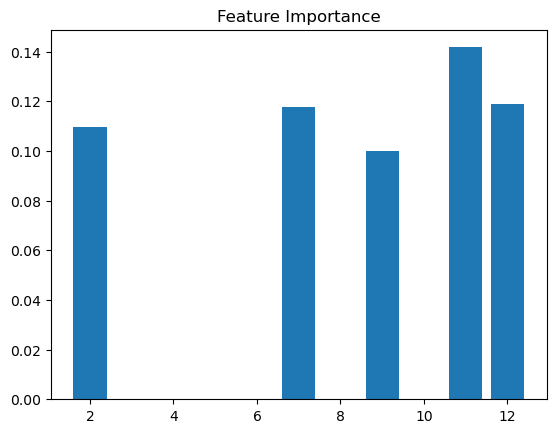

In [7]:
feature_imp=classifier.feature_importances_
top_features=np.argsort(classifier.feature_importances_)[-5:]
plt.bar(top_features,feature_imp[top_features])
plt.title("Feature Importance")
plt.show()

# 6.
## Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [8]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,4,6]
}
classifier=RandomForestClassifier()
clf = GridSearchCV(estimator=classifier, scoring='accuracy',param_grid=parameter, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [9]:
clf.best_params_

{'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 50}

# 7.
## Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

### This code will first create a parameter grid, which is a dictionary that specifies the values that the hyperparameters of the random forest classifier will be searched over. The parameter grid specifies that the number of trees in the forest (n_estimators) will be 50, 100, or 200, the maximum depth of each tree (max_depth) will be 5, 10, or 15, the minimum number of samples required to split an internal node (min_samples_split) will be 2, 5, or 10, and the minimum number of samples required to be at a leaf node (min_samples_leaf) will be 1, 4, or 6.

# 8.
## Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


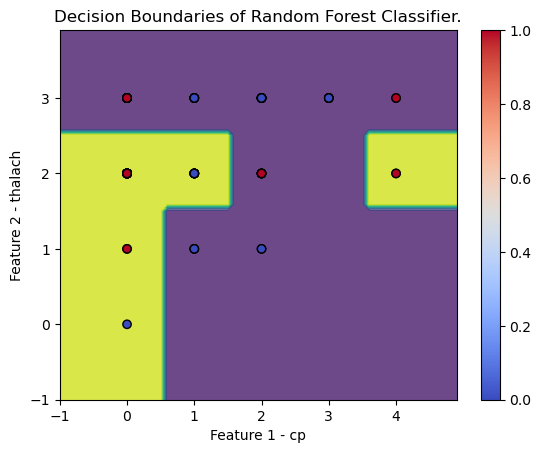

In [22]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_imp})
top_2_features = feature_importance_df.nlargest(2, 'Importance')
selected_features = top_2_features["Feature"].values
X_train_two = X_train[selected_features]
X_test_two = X_test[selected_features]

clf_two_features = RandomForestClassifier(random_state=42)
clf_two_features.fit(X_train_two, y_train)

x_min, x_max = X_test_two.iloc[:, 0].min() - 1, X_test_two.iloc[:, 0].max() + 1
y_min, y_max = X_test_two.iloc[:, 1].min() - 1, X_test_two.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf_two_features.predict(grid_points)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_two.iloc[:, 0], X_test_two.iloc[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1 - cp')
plt.ylabel('Feature 2 - thalach')
plt.title('Decision Boundaries of Random Forest Classifier.')
plt.colorbar()
plt.show()